# Feature Engineering Homework 
***
**Name**: **Prashil Bhimani**

**Kaggle Username**: **prashilbhimani**
***

This assignment is due on Moodle by **5pm on Friday February 23rd**. Additionally, you must make at least one submission to the **Kaggle** competition before it closes at **4:59pm on Friday February 23rd**. Submit only this Jupyter notebook to Moodle. Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI5622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy)



## Overview 
***

When people are discussing popular media, there’s a concept of spoilers. That is, critical information about the plot of a TV show, book, or movie that “ruins” the experience for people who haven’t read / seen it yet.

The goal of this assignment is to do text classification on forum posts from the website [tvtropes.org](http://tvtropes.org/), to predict whether a post is a spoiler or not. We'll be using the logistic regression classifier provided by sklearn.

Unlike previous assignments, the code provided with this assignment has all of the functionality required. Your job is to make the functionality better by improving the features the code uses for text classification.

**NOTE**: Because the goal of this assignment is feature engineering, not classification algorithms, you may not change the underlying algorithm or it's parameters

This assignment is structured in a way that approximates how classification works in the real world: Features are typically underspecified (or not specified at all). You, the data digger, have to articulate the features you need. You then compete against others to provide useful predictions.

It may seem straightforward, but do not start this at the last minute. There are often many things that go wrong in testing out features, and you'll want to make sure your features work well once you've found them.


## Kaggle In-Class Competition 
***

In addition to turning in this notebook on Moodle, you'll also need to submit your predictions on Kaggle, an online tournament site for machine learning competitions. The competition page can be found here:  

[https://www.kaggle.com/c/feature-engineering-csci-5622-spring-2018](https://www.kaggle.com/c/feature-engineering-csci-5622-spring-2018)

Additionally, a private invite link for the competition has been posted to Piazza. 

The starter code below has a `model_predict` method which produces a two column CSV file that is correctly formatted for Kaggle (predictions.csv). It should have the example Id as the first column and the prediction (`True` or `False`) as the second column. If you change this format your submissions will be scored as zero accuracy on Kaggle. 

**Note**: You may only submit **THREE** predictions to Kaggle per day.  Instead of using the public leaderboard as your sole evaluation processes, it is highly recommended that you perform local evaluation using a validation set or cross-validation. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 

### [25 points] Problem 1: Feature Engineering 
***

The `FeatEngr` class is where the magic happens.  In it's current form it will read in the training data and vectorize it using simple Bag-of-Words.  It then trains a model and makes predictions.  

25 points of your grade will be generated from your performance on the the classification competition on Kaggle. The performance will be evaluated on accuracy on the held-out test set. Half of the test set is used to evaluate accuracy on the public leaderboard.  The other half of the test set is used to evaluate accuracy on the private leaderboard (which you will not be able to see until the close of the competition). 

You should be able to significantly improve on the baseline system (i.e. the predictions made by the starter code we've provided) as reported by the Kaggle system.  Additionally, the top **THREE** students from the **PRIVATE** leaderboard at the end of the contest will receive 5 extra credit points towards their Problem 1 score.


In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]     
    

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
class QuoteVectorizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        return self
    def transform(self, examples,y=None):
        value=[]
        for i in examples :
            value.append(i.count('"')/len(i.split(" ")))
            
        value=np.rot90(np.asmatrix(value))
        return value

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
class POSVectorizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        return self
    def transform(self, examples,y=None):
        value=[]
        import nltk
        from nltk import pos_tag, word_tokenize
        for i in examples :
            text = word_tokenize(i)
            a=nltk.pos_tag(text)
            noun_count=0
            verb_count=0
            for x in a:
                if x[1]=="NN" or x[1]=="PP":
                    noun_count=noun_count+1
                if x[1]=="VB" or x[1]=="RB":
                    verb_count=verb_count+1
            value.append([noun_count/len(a),verb_count/len(a)])
            
        value=np.asmatrix(value)
        return value

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
class SentenceSentimentVectorizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        return self
    def transform(self, examples,y=None):
        value=[]
        from nltk.sentiment.vader import SentimentIntensityAnalyzer
        sid = SentimentIntensityAnalyzer()
        for i in examples :
            value.append(sid.polarity_scores(i)["compound"])
        value=np.rot90(np.asmatrix(value))
        return value

In [13]:
import re
def remove_punctuation(text):
    punctuation_numbers_specialcharacters = re.compile(r'[^a-zA-Z ]')
    text = punctuation_numbers_specialcharacters.sub('', text)
    return text.lower()
class FeatEngr:
    def __init__(self):
        from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
        from sklearn.pipeline import FeatureUnion,Pipeline
        from sklearn.feature_selection import SelectPercentile,SelectKBest, f_classif
        
        self.one_gram_vectorizer = TfidfVectorizer(analyzer='word', 
                                          binary=False,
                                          decode_error='strict',
                                          encoding='utf-8',
                                          input='content',
                                          lowercase=True,
                                          max_df=1.0,
                                          preprocessor=remove_punctuation,
                                          max_features=None,
                                          min_df=1,
                                          stop_words='english',
                                          ngram_range=(1, 1),
                                          strip_accents=None,
                                          token_pattern='(?u)\\b\\w\\w+\\b',
                                          vocabulary=None,
                                          use_idf=True)
        self.two_gram_vectorizer=TfidfVectorizer(analyzer='word', 
                                          binary=False,
                                          decode_error='strict',
                                          encoding='utf-8',
                                          input='content',
                                          lowercase=True,
                                          max_df=1.0,
                                          max_features=None,
                                          min_df=1,
                                          ngram_range=(2, 2),
                                          strip_accents=None,
                                          token_pattern='(?u)\\b\\w\\w+\\b',
                                          vocabulary=None,
                                          use_idf=True)
        self.trope_vectorizer = CountVectorizer()
        self.pos_vectorizer=POSVectorizer()
        self.feature_selector = SelectPercentile(f_classif, percentile=80)
        
        self.allmyfeatures = FeatureUnion([
            ('subject1', Pipeline([
                ('selector', ItemSelector(key='sentence')),
                ('tfidf', self.one_gram_vectorizer),
            ])),
            ('subject2', Pipeline([
                ('selector', ItemSelector(key='sentence')),
                ('tfidf2', self.two_gram_vectorizer),
            ])),
            ('subject3', Pipeline([
                ('selector', ItemSelector(key='trope')),
                ('TropeVectorizer',self.trope_vectorizer) ,
            ])),
             ('subject4', Pipeline([
                 ('selector', ItemSelector(key='trope')),
                 ('POSVectorizer', self.pos_vectorizer),
             ]))
        ])
        dfTrain = pd.read_csv("../data/spoilers/train.csv")
        x=dfTrain
        
        self.train_data=dfTrain.drop(['spoiler'], axis=1)
        self.train_label=np.asarray(x.drop(['sentence','trope','page'],axis=1)).ravel()
        
        dfTest  = pd.read_csv("../data/spoilers/test.csv")
        self.test_data=dfTest.drop(['page'], axis=1)
        
    def plot_learning_curve(self,title,ylim=None, cv=10,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
        import numpy as np
        import matplotlib.pyplot as plt
        from sklearn.naive_bayes import GaussianNB
        from sklearn.svm import SVC
        from sklearn.datasets import load_digits
        from sklearn.model_selection import learning_curve
        from sklearn.model_selection import ShuffleSplit
       
        estimator=self.logreg
        X=self.X_train
        y=self.train_label
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        return plt
                
    
    def tokenize(self,text):
        import nltk
        import string
        from nltk.corpus import wordnet
        text=text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
        tokens = nltk.word_tokenize(text)
        stemmed = []
        for item in tokens :
            #if wordnet.synsets(item):
            stemmed.append(self.stemmer.stem(item))
        return stemmed        

    def build_train_features(self,data,label):
        """
        Method to take in training text features and do further feature engineering 
        Most of the work in this homework will go here, or in similar functions  
        :param examples: currently just a list of forum posts  
        """
        return self.allmyfeatures.fit_transform(data,label)

    def get_test_features(self,data):
        """
        Method to take in test text features and transform the same way as train features 
        :param examples: currently just a list of forum posts  
        """
        return self.allmyfeatures.transform(data)
    
    def show_top10(self):
        """
        prints the top 10 features for the positive class and the 
        top 10 features for the negative class. 
        """
        feature_names = list(self.one_gram_vectorizer.get_feature_names()+self.two_gram_vectorizer.get_feature_names()+self.trope_vectorizer.get_feature_names()+["num_noun","num_verb"])
        selected_features=self.feature_selector.get_support()
        features=[]
        for i in zip(feature_names,selected_features):
            if i[1]:
                features.append(str(i[0]))
        
        features=np.asarray(features)
        top10 = np.argsort(self.logreg.coef_[0])[-10:]
        bottom10 = np.argsort(self.logreg.coef_[0])[:10]
        print("Pos: %s" % " ".join(features[top10]))
        print("Neg: %s" % " ".join(features[bottom10]))
    def train_model(self, random_state=1234):
        """
        Method to read in training data from file, and 
        train Logistic Regression classifier. 
        
        :param random_state: seed for random number generator 
        """
        
        
        from sklearn.linear_model import LogisticRegression 
        
        self.X_train = self.build_train_features(self.train_data,self.train_label)
        self.X_train = self.feature_selector.fit_transform(self.X_train, self.train_label)
        # train logistic regression model.  !!You MAY NOT CHANGE THIS!!
        self.logreg = LogisticRegression(random_state=random_state)
        
        from sklearn.model_selection import KFold
        kf = KFold(n_splits=10, random_state=None, shuffle=True)            
        scores_list = [self.logreg.fit(self.X_train[train], self.train_label[train]).score(self.X_train[test], self.train_label[test] )
            for train, test in kf.split(self.X_train)]
        print("scores list:" +str(scores_list))
        print("mean:" ,np.mean(scores_list))
        self.logreg.fit(self.X_train, self.train_label)
    def model_predict(self):
        """
        Method to read in test data from file, make predictions
        using trained model, and dump results to file 
        """
        # featurize test data 
        self.X_test = self.get_test_features(self.test_data)
        self.X_test=self.feature_selector.transform(self.X_test)
         # make predictions on test data 
        pred = self.logreg.predict(self.X_test)
        #self.show_misclassified()
        # dump predictions to file for submission to Kaggle  
        pd.DataFrame({"spoiler": np.array(pred, dtype=bool)}).to_csv("prediction.csv", index=True, index_label="Id")
    def error_analysis(self):
        report_step=10
        j=0
        # featurize test data 
        features = self.get_test_features(self.train_data)
        features= self.feature_selector.transform(features)
        # make predictions on test data 
        pred = self.logreg.predict(features)
        for i in range(len(pred)):
            if pred[i]!=self.train_label[i]:
                if j%report_step==0:
                    print(self.train_data['sentence'][i])
                    print("True label "+str(self.train_label[i]))
                    print("Predictied label "+str(pred[i]))
                j=j+1
        

scores list:[0.81620718462823727, 0.80952380952380953, 0.82456140350877194, 0.8128654970760234, 0.82873851294903922, 0.81370091896407681, 0.80701754385964908, 0.81453634085213034, 0.80952380952380953, 0.82539682539682535]
mean: 0.816207184628
Pos: foreshadowing actually killed xanatosgambit death kills finale revealed dies whamepisode
Neg: the show catchphrase one episode tim deadpansnarker usually drew domcom spinoff cory


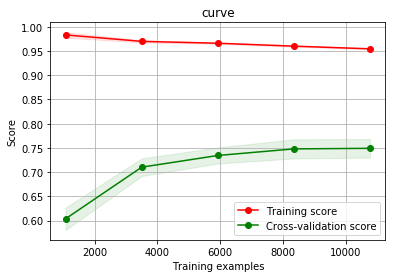

In [14]:
# Instantiate the FeatEngr clas 
feat = FeatEngr()

#feat.explore_data1()
# Train your Logistic Regression classifier 
feat.train_model(random_state=1200)

# Shows the top 10 features for each class 
feat.show_top10()
feat.plot_learning_curve("curve")
#feat.error_analysis()
# Make prediction on test data and produce Kaggle submission file 
feat.model_predict()

### [25 points] Problem 2: Motivation and Analysis 
***

The job of the written portion of the homework is to convince the grader that:

- Your new features work
- You understand what the new features are doing
- You had a clear methodology for incorporating the new features

Make sure that you have examples and quantitative evidence that your features are working well. Be sure to explain how you used the data (e.g., did you have a validation set? did you do cross-validation?) and how you inspected the results. In addition, it is very important that you show some kind of an **error analysis** throughout your process.  That is, you should demonstrate that you've looked at misclassified examples and put thought into how you can craft new features to improve your model. 

A sure way of getting a low grade is simply listing what you tried and reporting the Kaggle score for each. You are expected to pay more attention to what is going on with the data and take a data-driven approach to feature engineering.

### Answer
*** 

To add new features I wrote a function named explore_data() (See code above)r various features I was able to get the following features

1. N-Grams

2. Tropes

3. Parts of Speech

4. Number of Quotes

5. Sentiment of sentences

Out of these features 1, 2 and 3 perform very well on the both the Train and Test samples. Feature 4 works well on the Train data but not on the test data. Feature 5  did not work well on the test or the train data.

#### Feature 1 - N-Grams

One of the 1st papers I read was by Prof. Jordan Graber while working on the same dataset. He gave a pretty nice explanation about how bigarms describe transitive verbs such has "to kill" etc. To capture these kinds of transitive verbs we had to make sure that we do not remove stop words because that may lead to loss of such important information.

But while analyzing 1-grams it is important to remove the stop words as they will not have any value on their own without the verbs connecting them. Also logically it would make sense to have stemming to merge words such as "kill, kills and killed". But after doing some error analysis on these it turns out that words in past tense like "killed" were not usually seen in spoiler but words like "kills" which are based in future or present tense will indicate that they are spoilers. Hence stemming was not a good idea. 


Also instead of the basic CountVectorizer used in baseline it was important to use something that would take into considreation the overall importance over all the sentences. Hence I used TFIDVectorizer.

Reading more about TFIDVectorizer, I came across using_idf parameter which negates the importance of long sentences.

Hence with these observations I developed 2 feature extractors one with TFIDVectorizer for 1-grams which will remove stop words and other 2-grams which will have almost no preprocessing.

#### Feature 2 - Tropes

As defined by TVTropes.com are "A trope is a storytelling device or convention, a shortcut for describing situations the storyteller can reasonably assume the audience will recognize." 

These are meant to describe some common types of things that happen in a TV Show. So a particular type of event across various shows will given a particular trope. 

So accordingly if a particular trope is related to spoilers then we can assume that there some other sentence of the same trope will also be a spoiler.

Tropes are treated as categorical data.

To use the Trope as a feature I converted it using a CountVectorizer. OneHotEncoding is will also give the same result!

#### Feature 3 - Parts of Speech

After doing error analysis using the function I wrote about I found that most of the Spoilers have more number of nouns and verbs as compared to non spoiler statements. This logically makes sens becuase to describe a plot you will have to name characters and describe a particular action. These are the main examples of nouns and verbs. 

So I added 2 features namesly num_nouns and num_verbs. But one cavet was that the larger the sentence the more noun and verbs it will have. So I had to normalize the count by the length of the sentence.

After adding that feature there was about 2% increase in accuracy and hence I was able to determine that it was a good feature.

I wrote a new class POSVectorizer that is used in feature union.

The class uses nltk to pos-tagger to count the number of noun and verbs.


In [9]:
def explore_data_sentiment():
    dfTrain = pd.read_csv("../data/spoilers/train.csv")
    examples=list(dfTrain["sentence"])
    spoiler=list(dfTrain["spoiler"])
    page_dict={}
    value=[]
    import nltk
    from nltk import pos_tag, word_tokenize
    for i in examples :
        text = word_tokenize(i)
        a=nltk.pos_tag(text)
        noun_count=0
        verb_count=0
        for x in a:
            if x[1]=="NN":
                noun_count=noun_count+1
            if x[1]=="VB" or x[1]=="RB":
                verb_count=verb_count+1
        value.append([noun_count/len(a),verb_count/len(a)])
    #plt.plot(value,spoiler,"ro" )
    noun_in_spoiler=[]
    verb_in_spoiler=[]
    noun_in_not_spoiler=[]
    verb_in_not_spoiler=[]
    num_spoiler=0
    for i in zip(value,spoiler):
        if i[1]:
            noun_in_spoiler.append(i[0][0])
            verb_in_spoiler.append(i[0][1])
        else:
            noun_in_not_spoiler.append(i[0][0])
            verb_in_not_spoiler.append(i[0][1])
    print("Average nouns per sentence in spoiler ",end="")
    print(np.mean(noun_in_spoiler))
    print("Average verb per sentence in spoiler ",end="")
    print(np.mean(verb_in_spoiler))
    print("Average noun per sentence in spoiler ",end="")
    print(np.mean(noun_in_not_spoiler))
    print("Average verb per sentence in non-spoiler ",end="")
    print(np.mean(verb_in_not_spoiler))
explore_data_sentiment()

Average nouns per sentence in spoiler 0.109515945546
Average verb per sentence in spoiler 0.0844051991425
Average noun per sentence in spoiler 0.115856269944
Average verb per sentence in non-spoiler 0.078719678245


#### Feature 4 - Number of Quotes

After doing further research on TVTropes.org I came across this page : http://tvtropes.org/pmwiki/pmwiki.php/Main/Spoiler which gave me a hint that spoilerly sentences may have some quotes by the characters and hence I decided to add a new feature number of quotes. 

So I wrote a class QuotesVectorizer where I counted the number of quotes in a sentence and divided it by 2 as that 1 dalogue needs 2 quotes. But a similar cavet was that the larger the sentence the more chances of having a quote. So I had to normalize the count by the length of the sentence.

After adding that feature there was about 1% increase in accuracy and hence I was able to determine that it was a good feature.

In [10]:
def explore_data_quotes():
    dfTrain = pd.read_csv("../data/spoilers/train.csv")
    examples=list(dfTrain["sentence"])
    spoiler=list(dfTrain["spoiler"])
    page_dict={}
    value=[]
    from nltk.sentiment import SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()
    for i in examples :
        value.append(i.count('"'))
    value=np.rot90(np.asmatrix(value))
    quotes_in_spoiler=[]
    quotes_in_not_spoiler=[]
    num_spoiler=0
    for i in zip(value,spoiler):
        if i[1]:
            quotes_in_spoiler.append(i[0])
        else:
            quotes_in_not_spoiler.append(i[0])
            
    print(np.mean(quotes_in_spoiler))
    print(np.mean(quotes_in_not_spoiler))
   
explore_data_quotes()

0.427480916031
0.41781063006


C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


#### Feature 5 - Sentiment of sentences

Reading on in TVTropes there is a particular statement they had about spoilers being sentences that overzealous users have posted. So after doing some further digging in the data set I found that some spoilers have a lot of strong emotions like "They killed him" and so on. So I decided to have a new feature that could extract this. Hence I decided to analyse the sentiment of a sentence and decide if that will make a good feature.

So nltk has a "Vader" corpus which can be used to analyze the sentiment of a statement. I focused on postive and negative sentiments rather than neutral sentiments. 

These features did not give a huge bump in training accuracy and also test accuracy.

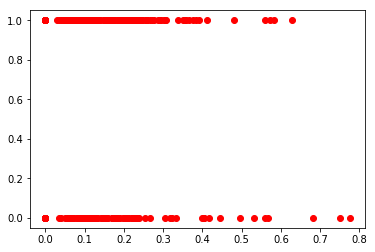

In [12]:
def explore_data_sentiment():
    dfTrain = pd.read_csv("../data/spoilers/train.csv")
    examples=list(dfTrain["sentence"])
    spoiler=list(dfTrain["spoiler"])
    page_dict={}
    value=[]
    from nltk.sentiment import SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()
    for i in examples :
        value.append(sid.polarity_scores(i)["pos"])
    value=np.rot90(np.asmatrix(value))
    import matplotlib.pyplot as plt
    plt.plot(value[:500],spoiler[:500],"ro" )
explore_data_sentiment()

### Error Analysis, Cross validation and feature selection

I wrote a function named error_analysis that would print the misclassified points in the training data. To get a better idea I did do both K-Fold cross validation and plotted a learning curve. There was a huge gap between the training curve and the validation curve. That indicated that I need more features. That could be acquired by using extra dataset (I had time to add genre and other extra features but wanted to get the best accuracy using the available dataset)

My K-Fold score is about 81.25% which is about 9% higher than the test accuracy score which means there was not a lot of overfitting. To negate overfitting I eliminated 20% features which were not important. Most of the eliminated features were from 1 and 2 grams as the lower 20% would be words that do not occur frequently or might not be general spoilery terms and not eliminiating those would just lead to overfitting on my training data.

I used SelectPercentile from scikit_learn to select the 80% of the best features.

### Hints 
***

- Don't use all the data until you're ready. 

- Examine the features that are being used.

- Do error analyses.

- If you have questions that aren’t answered in this list, feel free to ask them on Piazza.

### FAQs 
***

> Can I heavily modify the FeatEngr class? 

Totally.  This was just a starting point.  The only thing you cannot modify is the LogisticRegression classifier.  

> Can I look at TV Tropes?

In order to gain insight about the data yes, however, your feature extraction cannot use any additional data (beyond what I've given you) from the TV Tropes webpage.

> Can I use IMDB, Wikipedia, or a dictionary?

Yes, but you are not required to. So long as your features are fully automated, they can use any dataset other than TV Tropes. Be careful, however, that your dataset does not somehow include TV Tropes (e.g. using all webpages indexed by Google will likely include TV Tropes).

> Can I combine features?

Yes, and you probably should. This will likely be quite effective.

> Can I use Mechanical Turk?

That is not fully automatic, so no. You should be able to run your feature extraction without any human intervention. If you want to collect data from Mechanical Turk to train a classifier that you can then use to generate your features, that is fine. (But that’s way too much work for this assignment.)

> Can I use a Neural Network to automatically generate derived features? 

No. This assignment is about your ability to extract meaningful features from the data using your own experimentation and experience.

> What sort of improvement is “good” or “enough”?

If you have 10-15% improvement over the baseline (on the Public Leaderboard) with your features, that’s more than sufficient. If you fail to get that improvement but have tried reasonable features, that satisfies the requirements of assignment. However, the extra credit for “winning” the class competition depends on the performance of other students.

> Where do I start?  

It might be a good idea to look at the in-class notebook associated with the Feature Engineering lecture where we did similar experiments. 


> Can I use late days on this assignment? 

You can use late days for the write-up submission, but the Kaggle competition closes at **4:59pm on Friday February 23rd**

> Why does it say that the competition ends at 11:59pm when the assignment says 4:59pm? 

The end time/date are in UTC.  11:59pm UTC is equivalent to 4:59pm MST.  Kaggle In-Class does not allow us to change this. 